In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

In [2]:
mnist = load_digits()
print(mnist.data.shape)

(1797, 64)


In [3]:
print(mnist.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
 images = mnist.images
labels = mnist.target
data_size = len(images)

In [5]:
from sklearn.preprocessing import scale
images = images.reshape(data_size , -1)
images = scale(images)

In [6]:
X = mnist.data 
y = mnist.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [8]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1347, 64) (1347,)
(450, 64) (450,)


In [9]:
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([127, 140, 136, 143, 129, 134, 133, 138, 129, 138], dtype=int64))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([51, 42, 41, 40, 52, 48, 48, 41, 45, 42], dtype=int64))


In [10]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [11]:
kVals = np.arange(3,100,2)
accuracies = []
for k in kVals:
  model = KNN(n_neighbors= k)
  model.fit(X_train, y_train)
  scores = cross_val_score(model, X,y,cv=4, scoring='accuracy')
  pred = model.predict(X_test)
  acc = accuracy_score(y_test, pred)
  accuracies.append(acc)
  print("n_neighbors= "+str(k)+"; Accuracy: "+str(acc) , " : VAl Score :"+str(scores))

n_neighbors= 3; Accuracy: 0.9777777777777777  : VAl Score :[0.95555556 0.9532294  0.97327394 0.97104677]
n_neighbors= 5; Accuracy: 0.9755555555555555  : VAl Score :[0.94888889 0.96659243 0.97104677 0.96436526]
n_neighbors= 7; Accuracy: 0.9755555555555555  : VAl Score :[0.94444444 0.96436526 0.97104677 0.9532294 ]
n_neighbors= 9; Accuracy: 0.9755555555555555  : VAl Score :[0.93555556 0.96213808 0.97327394 0.95545657]
n_neighbors= 11; Accuracy: 0.9711111111111111  : VAl Score :[0.94222222 0.93986637 0.97104677 0.95545657]
n_neighbors= 13; Accuracy: 0.9688888888888889  : VAl Score :[0.94222222 0.93986637 0.9688196  0.9532294 ]
n_neighbors= 15; Accuracy: 0.9666666666666667  : VAl Score :[0.94       0.93541203 0.97550111 0.9532294 ]
n_neighbors= 17; Accuracy: 0.9666666666666667  : VAl Score :[0.93555556 0.94209354 0.97327394 0.94877506]
n_neighbors= 19; Accuracy: 0.9644444444444444  : VAl Score :[0.93555556 0.9376392  0.9688196  0.94877506]
n_neighbors= 21; Accuracy: 0.9666666666666667  : V

Text(0, 0.5, 'Accuracy')

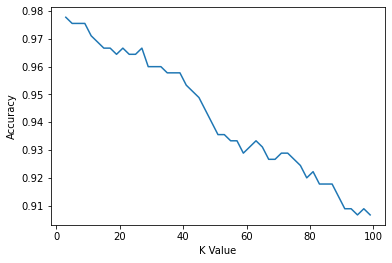

In [12]:
from matplotlib import pyplot as plt 
plt.plot(kVals, accuracies) 
plt.xlabel("K Value") 
plt.ylabel("Accuracy")

In [13]:
model = KNN(n_neighbors= 3) 
model.fit(X_train, y_train) 
pred = model.predict(X_train)
precision, recall, fscore, _ = precision_recall_fscore_support(y_train, pred)
print("Precision \n", precision)
print("\nRecall \n", recall)
print("\nF-score \n", fscore)

Precision 
 [1.         0.9929078  1.         1.         1.         1.
 0.98518519 1.         0.9921875  0.99275362]

Recall 
 [1.         1.         1.         1.         1.         0.99253731
 1.         0.99275362 0.98449612 0.99275362]

F-score 
 [1.         0.99644128 1.         1.         1.         0.99625468
 0.99253731 0.99636364 0.98832685 0.99275362]


In [14]:
model = KNN(n_neighbors= 3)
model.fit(X_train, y_train)
pred = model.predict(X_test)
acc = accuracy_score(y_test, pred)
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, pred)
print("Precision \n", precision)
print("\nRecall \n", recall)
print("\nF-score \n", fscore)
print(acc)

Precision 
 [1.         0.89361702 1.         0.95238095 0.98113208 1.
 1.         1.         1.         0.95      ]

Recall 
 [1.         1.         1.         1.         1.         0.95833333
 1.         1.         0.91111111 0.9047619 ]

F-score 
 [1.         0.94382022 1.         0.97560976 0.99047619 0.9787234
 1.         1.         0.95348837 0.92682927]
0.9777777777777777


In [15]:
error_rate = 1- acc
error_rate

0.022222222222222254

In [16]:
from sklearn.metrics import confusion_matrix ,  classification_report
CM = confusion_matrix(y_test,pred)
CM

array([[51,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 52,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 48,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 41,  0,  0],
       [ 0,  4,  0,  0,  0,  0,  0,  0, 41,  0],
       [ 0,  1,  0,  2,  1,  0,  0,  0,  0, 38]], dtype=int64)

In [17]:
print(f'Classification Report: \n{classification_report(y_test, pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.89      1.00      0.94        42
           2       1.00      1.00      1.00        41
           3       0.95      1.00      0.98        40
           4       0.98      1.00      0.99        52
           5       1.00      0.96      0.98        48
           6       1.00      1.00      1.00        48
           7       1.00      1.00      1.00        41
           8       1.00      0.91      0.95        45
           9       0.95      0.90      0.93        42

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



<AxesSubplot:>

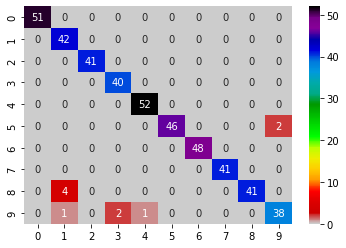

In [18]:
import seaborn as sns

sns.heatmap(CM, annot=True, cmap='nipy_spectral_r')